In [9]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
pd.set_option('display.max_columns', None) 
local_time_zone = pytz.timezone('US/Pacific')
plt.rcParams.update({'font.size': 14})

In [2]:
!pwd

/sdf/home/z/zihanzhu/lcls/fel_tuning


## get all filenames

In [3]:

path_dir = "/sdf/home/z/zihanzhu/lcls/fel_tuning/online/BE/20240201/"
# path2 = "/home/fphysics/ml_tuning/20240127_FACET2_inj_exploration/Data/tcav/"
# path3 = "/home/fphysics/ml_tuning/20240127_FACET2_inj_exploration/Scans/Data/"
# path4 = "/home/fphysics/ml_tuning/20240127_FACET2_inj_exploration/Bayes_Exp/Data/"

In [4]:
fnamelist_all_values = np.sort([i for i in glob.glob(path_dir+'*_BE.npy')])
                        # [i for i in glob.glob(path2+'*values*.npy')] +
                        # [i for i in glob.glob(path3+'*values*.npy')] +
                        # [i for i in glob.glob(path4+'*values*.npy')])
print('Number of files to be processed:', len(fnamelist_all_values))

Number of files to be processed: 333


In [5]:
#fnamelist_all_values.sort(

## Load data

In [49]:
i = 258
values_ex = np.load(fnamelist_all_values[i],allow_pickle=True)
values_dict = values_ex.item()
values_dict['hxr_pulse_intensity'] = values_dict['hxr_pulse_intensity'].mean()
values_dict['timestamp'] = fnamelist_all_values[i].split('_BE.npy')[0].split(path_dir)[1]
values_dict

{'QUAD:LI26:201:BCTRL': 6.903290875070411,
 'QUAD:LI26:301:BCTRL': -8.387153486858788,
 'QUAD:LI26:401:BCTRL': 6.016718206930641,
 'QUAD:LI26:501:BCTRL': -8.258574242664215,
 'QUAD:LI26:601:BCTRL': 17.089122399768748,
 'QUAD:LI26:701:BCTRL': -18.966667388244772,
 'QUAD:LI26:801:BCTRL': 8.361105108692046,
 'QUAD:LI26:901:BCTRL': -3.8442524419401183,
 'QUAD:LTUH:620:BCTRL': -43.61610702692035,
 'QUAD:LTUH:640:BCTRL': 46.12072364083138,
 'QUAD:LTUH:660:BCTRL': -70.7935398299428,
 'QUAD:LTUH:680:BCTRL': 56.22574902201285,
 'QUAD:LTUH:440:BCTRL': 0.16916055113707015,
 'QUAD:LTUH:460:BCTRL': -3.4859549932171556,
 'QUAD:LI21:201:BCTRL': -6.922847227333677,
 'QUAD:LI21:211:BCTRL': 6.311425448881306,
 'QUAD:LI21:271:BCTRL': -5.883335290250395,
 'QUAD:LI21:278:BCTRL': 8.140339720849726,
 'QUAD:LI21:221:BCTRL': -0.24876231781156175,
 'QUAD:LI21:251:BCTRL': -0.3199692077787548,
 'QUAD:LI24:740:BCTRL': 0.43632907496902873,
 'QUAD:LI24:860:BCTRL': -0.947663803457837,
 'QUAD:IN20:361:BCTRL': -3.82559

In [6]:
dataset = pd.DataFrame()
for i in range(len(fnamelist_all_values)):
    values_ex = np.load(fnamelist_all_values[i],allow_pickle=True)
    values_dict = values_ex.item()
    values_dict['hxr_pulse_intensity'] = values_dict['hxr_pulse_intensity'].mean()
    values_dict['timestamp'] = fnamelist_all_values[i].split('_BE.npy')[0].split(path_dir)[1]
    dataset = pd.concat([dataset, pd.DataFrame([values_dict])], ignore_index=True)

In [10]:
dataset

,QUAD:LI26:201:BCTRL,QUAD:LI26:301:BCTRL,QUAD:LI26:401:BCTRL,QUAD:LI26:501:BCTRL,QUAD:LI26:601:BCTRL,QUAD:LI26:701:BCTRL,QUAD:LI26:801:BCTRL,QUAD:LI26:901:BCTRL,QUAD:LTUH:620:BCTRL,QUAD:LTUH:640:BCTRL,QUAD:LTUH:660:BCTRL,QUAD:LTUH:680:BCTRL,QUAD:LTUH:440:BCTRL,QUAD:LTUH:460:BCTRL,QUAD:LI21:201:BCTRL,QUAD:LI21:211:BCTRL,QUAD:LI21:271:BCTRL,QUAD:LI21:278:BCTRL,QUAD:LI21:221:BCTRL,QUAD:LI21:251:BCTRL,QUAD:LI24:740:BCTRL,QUAD:LI24:860:BCTRL,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,QUAD:LI26:201:BACT,QUAD:LI26:301:BACT,QUAD:LI26:401:BACT,QUAD:LI26:501:BACT,QUAD:LI26:601:BACT,QUAD:LI26:701:BACT,QUAD:LI26:801:BACT,QUAD:LI26:901:BACT,QUAD:LTUH:620:BACT,QUAD:LTUH:640:BACT,QUAD:LTUH:660:BACT,QUAD:LTUH:680:BACT,QUAD:LTUH:440:BACT,QUAD:LTUH:460:BACT,QUAD:LI21:201:BACT,QUAD:LI21:211:BACT,QUAD:LI21:271:BACT,QUAD:LI21:278:BACT,QUAD:LI21:221:BACT,QUAD:LI21:251:BACT,QUAD:LI24:740:BACT,QUAD:LI24:860:BACT,QUAD:IN20:361:BACT,QUAD:IN20:371:BACT,QUAD:IN20:425:BACT,QUAD:IN20:441:BACT,QUAD:IN20:511:BACT,QUAD:IN20:525:BACT,SOLN:IN20:121:BACT,QUAD:IN20:121:BACT,QUAD:IN20:122:BACT,BPMS:LI30:201:TMITCUH1H,BLEN:LI21:265:AIMAXCUHBR,BLEN:LI24:886:BIMAXCUHBR,TORO:IN20:215:TMIT,TORO:IN20:431:TMIT,TORO:LI21:277:TMIT,TORO:CLTH:108:TMIT,LION:LI24:708:VACT,BPMS:LI24:801:X,CBLM:UNDH:1375:I1_LOSS,CBLM:UNDH:1475:I1_LOSS,CBLM:UNDH:1575:I1_LOSS,CBLM:UNDH:1675:I1_LOSS,CBLM:UNDH:1775:I1_LOSS,CBLM:UNDH:1875:I1_LOSS,CBLM:UNDH:1975:I1_LOSS,CBLM:UNDH:2075:I1_LOSS,CBLM:UNDH:2175:I1_LOSS,CBLM:UNDH:2275:I1_LOSS,CBLM:UNDH:2375:I1_LOSS,CBLM:UNDH:2475:I1_LOSS,CBLM:UNDH:2575:I1_LOSS,CBLM:UNDH:2675:I1_LOSS,CBLM:UNDH:2775:I1_LOSS,CBLM:UNDH:2875:I1_LOSS,CBLM:UNDH:2975:I1_LOSS,CBLM:UNDH:3075:I1_LOSS,CBLM:UNDH:3175:I1_LOSS,CBLM:UNDH:3275:I1_LOSS,CBLM:UNDH:3375:I1_LOSS,CBLM:UNDH:3475:I1_LOSS,CBLM:UNDH:3575:I1_LOSS,CBLM:UNDH:3675:I1_LOSS,CBLM:UNDH:3775:I1_LOSS,CBLM:UNDH:3875:I1_LOSS,CBLM:UNDH:3975:I1_LOSS,CBLM:UNDH:4075:I1_LOSS,CBLM:UNDH:4175:I1_LOSS,CBLM:UNDH:4275:I1_LOSS,CBLM:UNDH:4375:I1_LOSS,CBLM:UNDH:4475:I1_LOSS,CBLM:UNDH:4575:I1_LOSS,TOTAL_HARD_LOSSES,hxr_pulse_intensity,timestamp
0,6.647603,-8.331601,6.291201,-8.204403,16.752272,-19.502833,8.165544,-3.940481,-45.214981,47.612643,-69.776348,57.329790,0.157821,-3.527350,-7.140307,6.345844,-6.099260,8.117018,-0.249299,-0.303492,0.463045,-0.902205,-3.888900,2.960521,-1.254530,-0.001337,2.543719,-2.323882,0.4735,0.01200,-0.009,6.647618,-8.331584,6.291205,-8.204434,16.752330,-19.502855,8.165528,-3.940491,-45.214344,47.613245,-69.775943,57.329988,0.144497,-3.503032,-7.140293,6.345579,-6.094588,8.116174,-0.249107,-0.303252,0.463124,-0.901690,-3.885458,2.959576,-1.253936,-0.000231,2.543920,-2.322819,0.473501,0.011996,-0.009001,9.992288e+08,213.438609,3301.845960,1.673100e+09,1.477054e+09,9.903520e+08,0.0,0.268406,0.075385,-20.14584,-1.97232,-1.97232,-2.00754,-1.47924,-1.51446,-1.90188,-1.79622,-17.50434,0.88050,-2.39496,-2.67672,-1.79622,-1.86666,-1.09182,-1.33836,-1.62012,-0.77484,-0.73962,-1.76100,-1.47924,-1.26792,-1.54968,-1.16226,-1.23270,-1.90188,-1.62012,-1.37358,-0.03522,-1.30314,-1.69056,-1.76100,-1.19748,-83.04876,0.170458,1706816843.9872668
1,6.581127,-8.314443,6.237640,-8.277130,16.919795,-19.679422,8.247200,-3.979885,-45.461666,47.217148,-69.175141,57.169609,0.156243,-3.562624,-7.211710,6.287352,-6.160253,8.145395,-0.251792,-0.306527,0.458415,-0.893183,-3.850011,2.990126,-1.241985,-0.001350,2.518282,-2.347121,0.4735,0.01200,-0.009,6.581222,-8.314498,6.237672,-8.277154,16.919821,-19.679379,8.247119,-3.979861,-45.461096,47.217803,-69.174661,57.170155,0.143272,-3.538282,-7.211632,6.287566,-6.156095,8.144061,-0.251575,-0.306250,0.458499,-0.892645,-3.847043,2.988477,-1.240982,0.000018,2.518523,-2.346311,0.473501,0.011996,-0.009000,1.017844e+09,209.139515,3871.959353,1.661671e+09,1.492928e+09,1.021307e+09,0.0,0.272984,0.497997,-37.50930,-1.23270,-1.97232,-1.58490,-1.76100,-1.16226,-1.23270,-1.86

In [53]:
final_dataset = dataset.dropna()
# final_dataset.to_pickle(path_dir+'final_data.pkl')

In [46]:

nan_mask = dataset.isna()

# Use np.where to find the indices of NaNs in the DataFrame
nan_locations = np.where(nan_mask)

# The result is a tuple of arrays, where the first array contains row indices and the second array contains column indices of NaNs
for row, col in zip(*nan_locations):
    print(f"NaN found at Row: {row}, Col: {col} (Column Name: {dataset.columns[col]})")

NaN found at Row: 258, Col: 105 (Column Name: hxr_pulse_intensity)


In [174]:
df_read = pd.DataFrame.transpose(pd.DataFrame.from_dict(values_dict,orient='index'))

In [175]:
df_read

,SOLN:IN10:121:BACT,SOLN:IN10:111:BACT,QUAD:IN10:121:BACT,QUAD:IN10:122:BACT,QUAD:IN10:361:BACT,QUAD:IN10:371:BACT,QUAD:IN10:425:BACT,QUAD:IN10:441:BACT,QUAD:IN10:511:BACT,QUAD:IN10:525:BACT,...,PROF:IN10:571:RESOLUTION,PROF:IN10:711:Image:ArrayData,PROF:IN10:711:XRMS,PROF:IN10:711:YRMS,PROF:IN10:711:Image:ArraySize1_RBV,PROF:IN10:711:Image:ArraySize0_RBV,PROF:IN10:711:X,PROF:IN10:711:Y,PROF:IN10:711:RESOLUTION,timestamp
0,0.4,0.000013,-0.009296,0.0095,-3.222836,3.04975,-6.437481,6.713854,-2.610689,1.679802,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T17:47:23-08:00


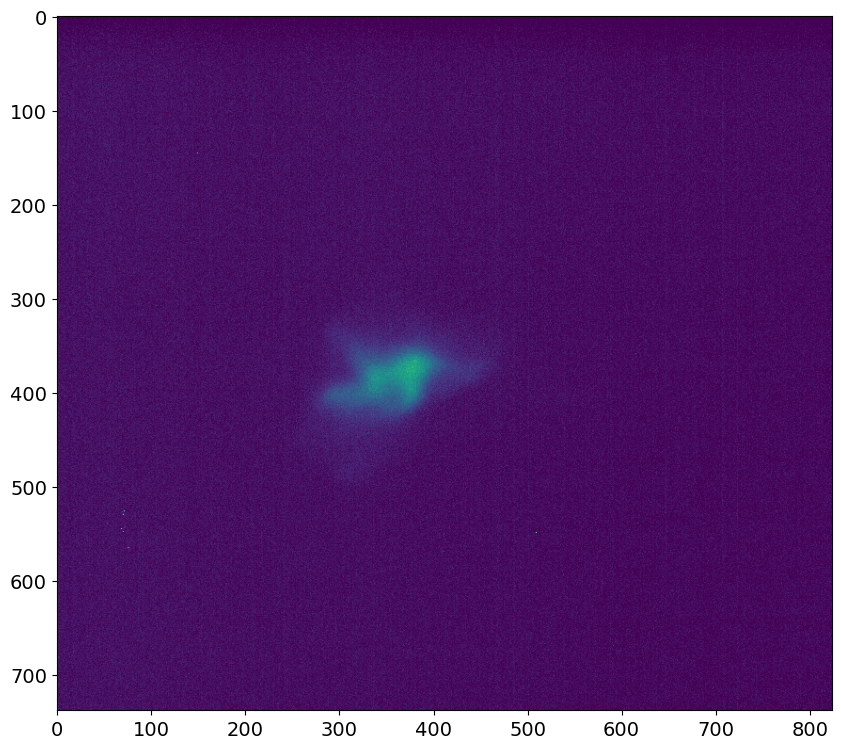

In [184]:
img = df_read["PROF:IN10:571:Image:ArrayData"][0]
ncol=df_read["PROF:IN10:571:Image:ArraySize1_RBV"][0]
nrow=df_read["PROF:IN10:571:Image:ArraySize0_RBV"][0]
beam_image = np.reshape(img,(ncol,nrow))
plt.figure(figsize = (10,10))
plt.imshow(beam_image)

# now do repeated

In [187]:
for i in range(0,len(fnamelist_all_values)):
    
    values_ex = np.load(fnamelist_all_values[i],allow_pickle=True)
    values_dict = values_ex.item()
    
    imgs_ex = np.load(fnamelist_all_imgs[i],allow_pickle=True)
    imgs_dict = imgs_ex.item()

    empty = {'CAMR:LT10:900:Image:ArrayData': '',
     'CAMR:LT10:900:XRMS': '',
     'CAMR:LT10:900:YRMS': '',
     'CAMR:LT10:900:Image:ArraySize1_RBV': '',
     'CAMR:LT10:900:Image:ArraySize0_RBV': '',
     'CAMR:LT10:900:X': '',
     'CAMR:LT10:900:Y': '',
     'CAMR:LT10:900:RESOLUTION': '',
     'PROF:IN10:241:Image:ArrayData': '',
     'PROF:IN10:241:XRMS':'',
     'PROF:IN10:241:YRMS': '',
     'PROF:IN10:241:Image:ArraySize1_RBV': '',
     'PROF:IN10:241:Image:ArraySize0_RBV': '',
     'PROF:IN10:241:X': '',
     'PROF:IN10:241:Y': '',
     'PROF:IN10:241:RESOLUTION': '',   
     'PROF:IN10:571:Image:ArrayData': '',
     'PROF:IN10:571:XRMS':'',
     'PROF:IN10:571:YRMS': '',
     'PROF:IN10:571:Image:ArraySize1_RBV': '',
     'PROF:IN10:571:Image:ArraySize0_RBV': '',
     'PROF:IN10:571:X': '',
     'PROF:IN10:571:Y': '',
     'PROF:IN10:571:RESOLUTION': '',
     'PROF:IN10:711:Image:ArrayData': '',
     'PROF:IN10:711:XRMS':'',
     'PROF:IN10:711:YRMS': '',
     'PROF:IN10:711:Image:ArraySize1_RBV': '',
     'PROF:IN10:711:Image:ArraySize0_RBV': '',
     'PROF:IN10:711:X': '',
     'PROF:IN10:711:Y': '',
     'PROF:IN10:711:RESOLUTION': ''}
    
    filled = imgs_dict
    
    result = {k: filled.get(k, 'NaN') for k in empty}

    Merge(values_dict, result)

    timestamp = fnamelist_all_values[i][-29:-4]
    values_dict['timestamp']=timestamp

    df_read = pd.concat([df_read,pd.DataFrame.transpose(pd.DataFrame.from_dict(values_dict,orient='index'))],axis=0, ignore_index=True)



   

In [188]:
df_read

,SOLN:IN10:121:BACT,SOLN:IN10:111:BACT,QUAD:IN10:121:BACT,QUAD:IN10:122:BACT,QUAD:IN10:361:BACT,QUAD:IN10:371:BACT,QUAD:IN10:425:BACT,QUAD:IN10:441:BACT,QUAD:IN10:511:BACT,QUAD:IN10:525:BACT,...,PROF:IN10:571:RESOLUTION,PROF:IN10:711:Image:ArrayData,PROF:IN10:711:XRMS,PROF:IN10:711:YRMS,PROF:IN10:711:Image:ArraySize1_RBV,PROF:IN10:711:Image:ArraySize0_RBV,PROF:IN10:711:X,PROF:IN10:711:Y,PROF:IN10:711:RESOLUTION,timestamp
0,0.4,0.000013,-0.009296,0.0095,-3.222836,3.04975,-6.437481,6.713854,-2.610689,1.679802,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T17:47:23-08:00
1,0.399999,0.000009,-0.009301,0.0095,-3.223822,3.049889,-6.440656,6.712466,-2.610925,1.679063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T10:58:28-08:00
2,0.399999,0.0,-0.0093,0.0095,-3.223976,3.049712,-6.442022,6.711299,-2.610955,1.680049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T10:59:50-08:00
3,0.399999,-0.000007,-0.0093,0.0095,-3.223837,3.049997,-6.44091,6.712378,-2.610088,1.679065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T11:01:03-08:00
4,0.399999,0.000009,-0.009295,0.0095,-3.222818,3.049917,-6.438905,6.713666,-2.609509,1.68008,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T17:46:00-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,0.409999,0.000007,-0.009296,0.0095,-3.222892,3.049866,-6.438096,6.714497,-2.610304,4.393699,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:01-08:00
1765,0.41,0.00001,-0.009295,0.0095,-3.222972,3.050049,-6.438485,6.712879,-2.611456,4.392827,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:06-08:00
1766,0.409999,0.0,-0.009296,0.0095,-3.222926,3.049929,-6.438911,6.714081,-2.610494,5.000623,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:13-08:00
1767,0.41,0.00001,-0.009296,0.0095,-3.22288,3.049952,-6.438115,6.715135,-2.610493,5.001537,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:18-08:00


In [189]:
df_read.to_pickle("./processed_data_all_data_frame.pkl")

In [2]:
df_check =pd.read_pickle("./processed_data_all_data_frame.pkl")

In [193]:
df_check

,SOLN:IN10:121:BACT,SOLN:IN10:111:BACT,QUAD:IN10:121:BACT,QUAD:IN10:122:BACT,QUAD:IN10:361:BACT,QUAD:IN10:371:BACT,QUAD:IN10:425:BACT,QUAD:IN10:441:BACT,QUAD:IN10:511:BACT,QUAD:IN10:525:BACT,...,PROF:IN10:571:RESOLUTION,PROF:IN10:711:Image:ArrayData,PROF:IN10:711:XRMS,PROF:IN10:711:YRMS,PROF:IN10:711:Image:ArraySize1_RBV,PROF:IN10:711:Image:ArraySize0_RBV,PROF:IN10:711:X,PROF:IN10:711:Y,PROF:IN10:711:RESOLUTION,timestamp
0,0.4,0.000013,-0.009296,0.0095,-3.222836,3.04975,-6.437481,6.713854,-2.610689,1.679802,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T17:47:23-08:00
1,0.399999,0.000009,-0.009301,0.0095,-3.223822,3.049889,-6.440656,6.712466,-2.610925,1.679063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T10:58:28-08:00
2,0.399999,0.0,-0.0093,0.0095,-3.223976,3.049712,-6.442022,6.711299,-2.610955,1.680049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T10:59:50-08:00
3,0.399999,-0.000007,-0.0093,0.0095,-3.223837,3.049997,-6.44091,6.712378,-2.610088,1.679065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T11:01:03-08:00
4,0.399999,0.000009,-0.009295,0.0095,-3.222818,3.049917,-6.438905,6.713666,-2.609509,1.68008,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T17:46:00-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,0.409999,0.000007,-0.009296,0.0095,-3.222892,3.049866,-6.438096,6.714497,-2.610304,4.393699,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:01-08:00
1765,0.41,0.00001,-0.009295,0.0095,-3.222972,3.050049,-6.438485,6.712879,-2.611456,4.392827,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:06-08:00
1766,0.409999,0.0,-0.009296,0.0095,-3.222926,3.049929,-6.438911,6.714081,-2.610494,5.000623,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:13-08:00
1767,0.41,0.00001,-0.009296,0.0095,-3.22288,3.049952,-6.438115,6.715135,-2.610493,5.001537,...,11.1732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-27T23:29:18-08:00


In [29]:
df_check.keys().to_list()

['SOLN:IN10:121:BACT',
 'SOLN:IN10:111:BACT',
 'QUAD:IN10:121:BACT',
 'QUAD:IN10:122:BACT',
 'QUAD:IN10:361:BACT',
 'QUAD:IN10:371:BACT',
 'QUAD:IN10:425:BACT',
 'QUAD:IN10:441:BACT',
 'QUAD:IN10:511:BACT',
 'QUAD:IN10:525:BACT',
 'SOLN:IN10:121:BCTRL',
 'SOLN:IN10:111:BCTRL',
 'QUAD:IN10:121:BCTRL',
 'QUAD:IN10:122:BCTRL',
 'QUAD:IN10:361:BCTRL',
 'QUAD:IN10:371:BCTRL',
 'QUAD:IN10:425:BCTRL',
 'QUAD:IN10:441:BCTRL',
 'QUAD:IN10:511:BCTRL',
 'QUAD:IN10:525:BCTRL',
 'KLYS:LI10:21:PDES',
 'KLYS:LI10:21:ADES',
 'KLYS:LI10:21:AMPL',
 'KLYS:LI10:21:PHAS',
 'KLYS:LI10:21:SFB_PDIS',
 'KLYS:LI10:31:PDES',
 'KLYS:LI10:31:ADES',
 'KLYS:LI10:31:AMPL',
 'KLYS:LI10:31:PHAS',
 'KLYS:LI10:41:PDES',
 'KLYS:LI10:41:ADES',
 'KLYS:LI10:41:AMPL',
 'KLYS:LI10:41:PHAS',
 'KLYS:LI10:51:PHAS',
 'KLYS:LI10:51:AMPL ',
 'LASR:LT10:930:PWR',
 'PMTR:HT10:950:PWR',
 'IOC:SYS1:MP01:LSHUTCTL',
 'BPMS:IN10:221:X',
 'BPMS:IN10:371:X',
 'BPMS:IN10:425:X',
 'BPMS:IN10:511:X',
 'BPMS:IN10:525:X',
 'BPMS:IN10:581:X',
 'BP

In [12]:
new_df = df_check[["PROF:IN10:711:XRMS","timestamp"]].replace('NaN', np.nan)

In [14]:
new_df

,PROF:IN10:711:XRMS,timestamp
0,NaN,2024-01-27T17:47:23-08:00
1,NaN,2024-01-27T10:58:28-08:00
2,NaN,2024-01-27T10:59:50-08:00
3,NaN,2024-01-27T11:01:03-08:00
4,NaN,2024-01-27T17:46:00-08:00
...,...,...
1764,NaN,2024-01-27T23:29:01-08:00
1765,NaN,2024-01-27T23:29:06-08:00
1766,NaN,2024-01-27T23:29:13-08:00
1767,NaN,2024-01-27T23:29:18-08:00


In [194]:
!pwd

/home/fphysics/ml_tuning/20240127_FACET2_inj_exploration


In [196]:
start_names_all_ctrl= [
    "SOLN:IN10:121:BCTRL",
    "SOLN:IN10:111:BCTRL",
    "QUAD:IN10:121:BCTRL",
    "QUAD:IN10:122:BCTRL",
    "QUAD:IN10:361:BCTRL",
    "QUAD:IN10:371:BCTRL",
    "QUAD:IN10:425:BCTRL",
    "QUAD:IN10:441:BCTRL",
    "QUAD:IN10:511:BCTRL",
    "QUAD:IN10:525:BCTRL",
              
    "KLYS:LI10:21:PDES",#gun
    "KLYS:LI10:21:ADES", 
              
    "KLYS:LI10:31:PDES", #L0A
    "KLYS:LI10:31:ADES",
               
    "KLYS:LI10:41:PDES", #L0B
    "KLYS:LI10:41:ADES"]

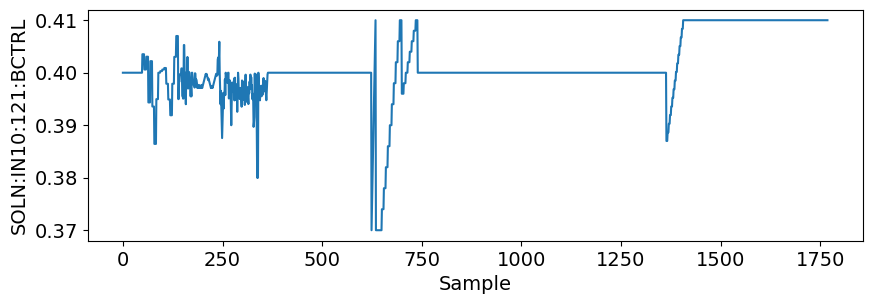

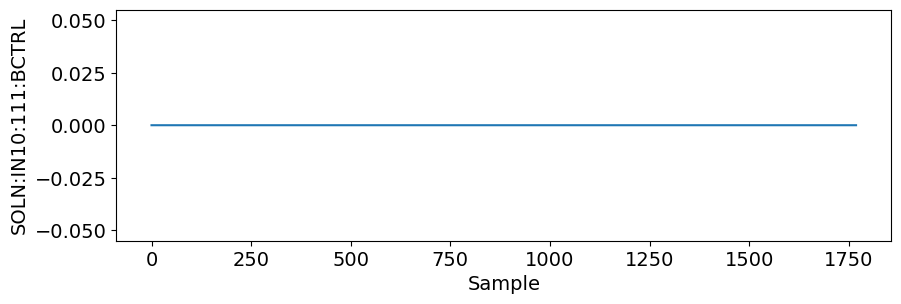

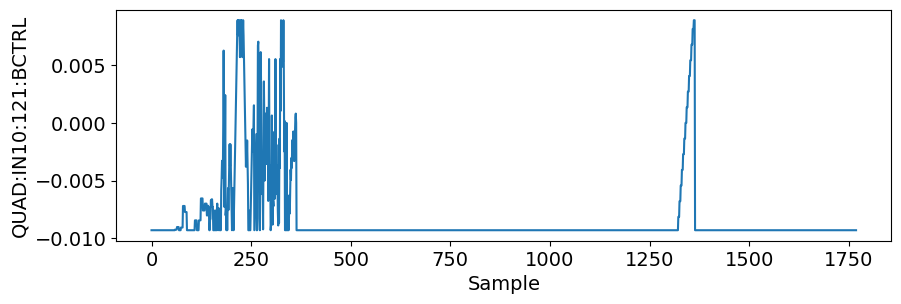

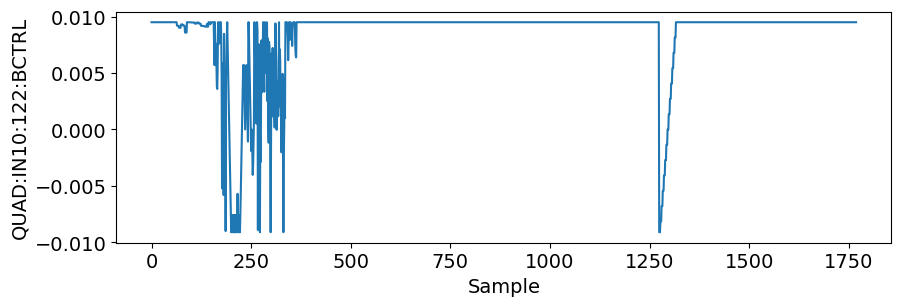

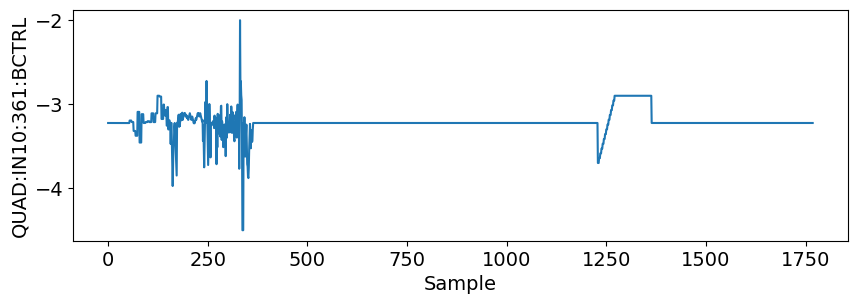

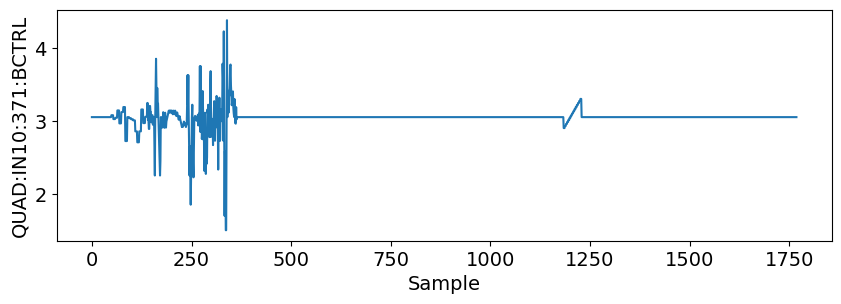

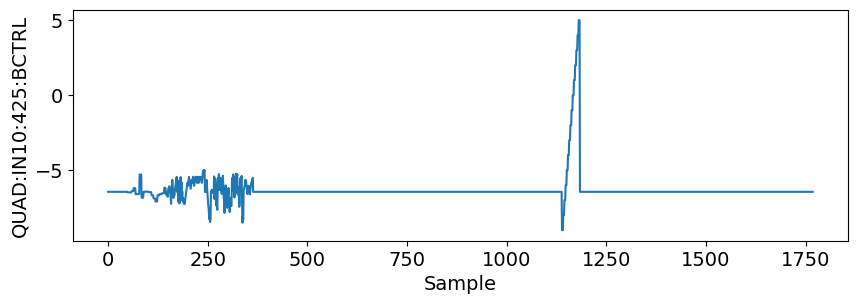

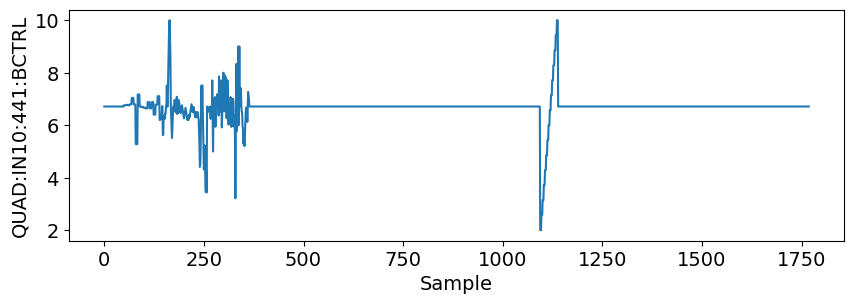

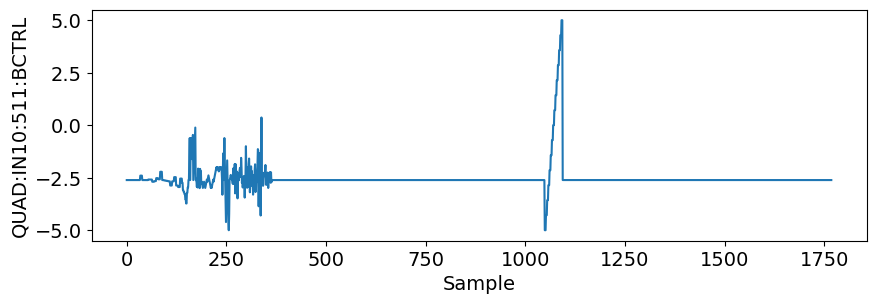

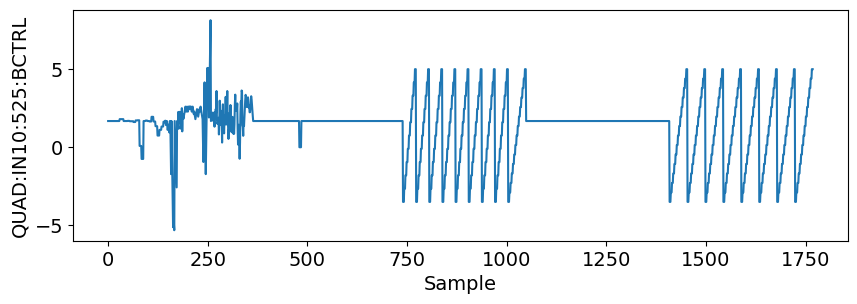

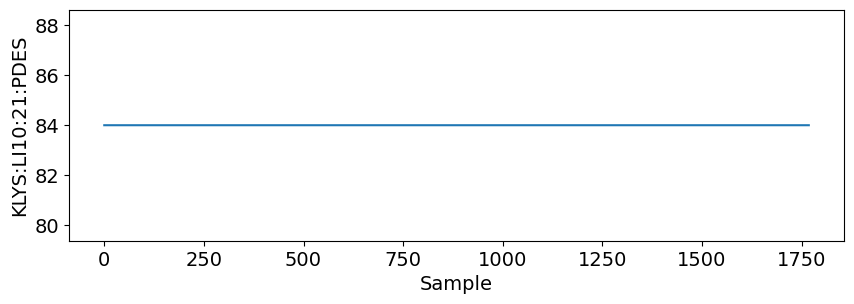

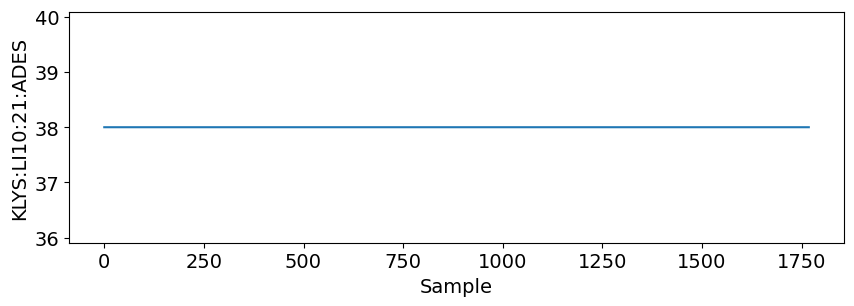

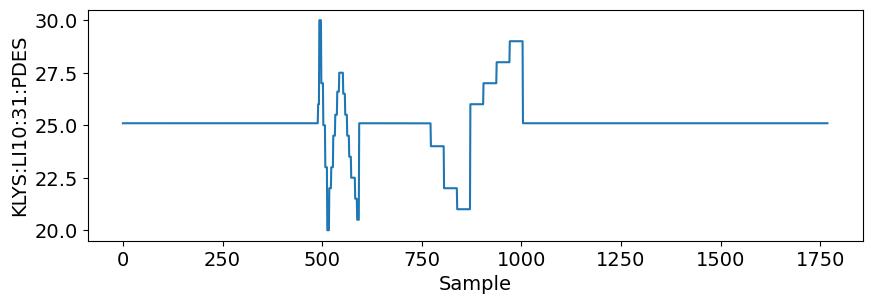

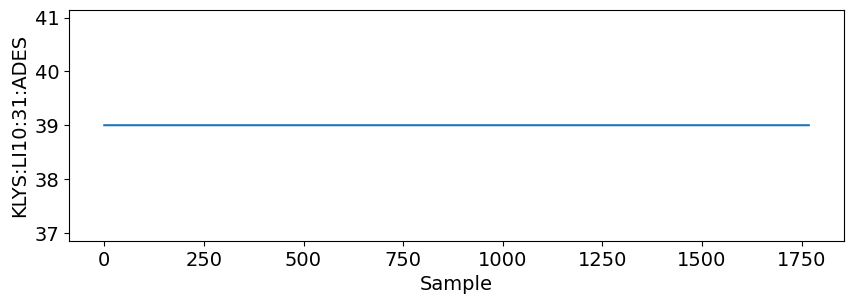

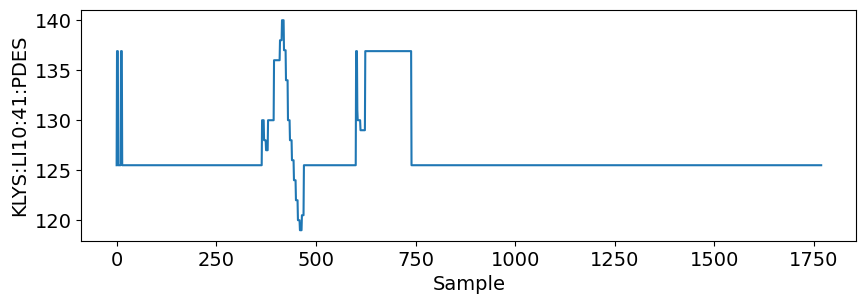

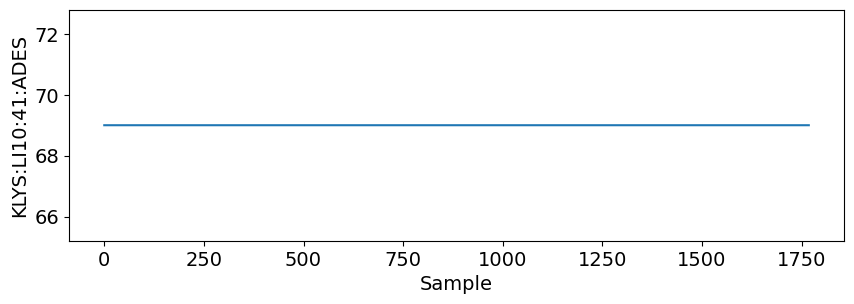

In [205]:
for name in start_names_all_ctrl:
    plt.figure(figsize = (10,3))
    plt.plot(df_check[name])
    plt.ylabel(name)
    plt.xlabel("Sample")
    plt.plot()
    